In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckplus/ck/CK+48/surprise/S071_001_00000012.png
/kaggle/input/ckplus/ck/CK+48/surprise/S082_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S116_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S097_001_00000020.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S127_001_00000015.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S107_001_00000008.png
/kaggle/input/ckplus/ck/CK+48/surprise/S138_004_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S126_004_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S090_002_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S100_002_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S063_001_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S052_001_00000014.png
/kaggle/input/ckplus/ck/

In [93]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
print(os.listdir("../input/"))


['ckplus']


In [94]:
print(os.listdir("../input/ckplus/"))

['ck', 'CK+48']


In [95]:
print(os.listdir("../input/ckplus/CK+48/"))

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']


In [96]:
dataset_path = "/kaggle/input/ckplus/CK+48"

In [97]:
# Load and preprocess the dataset
def load_dataset():
    data = []
    labels = []

    emotions = os.listdir(dataset_path)
    label_encoder = LabelEncoder()

    for emotion in emotions:
        emotion_folder = os.path.join(dataset_path, emotion)
        for image_file in os.listdir(emotion_folder):
            image_path = os.path.join(emotion_folder, image_file)
            image = load_img(image_path, target_size=(48, 48))
            image = img_to_array(image)
            data.append(image)
            labels.append(emotion)

    data = np.array(data, dtype='float32') / 255.0
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels, num_classes=len(emotions))

    return data, labels

In [98]:
# Split the dataset into training and testing sets
data, labels = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [99]:
# Build the CNN model with Spatial Pyramid Pooling
def build_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # Add Spatial Pyramid Pooling layer
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [100]:
# Model parameters
input_shape = (48, 48, 3)
num_classes = len(os.listdir(dataset_path))
num_classes

7

In [101]:
# Build the model
model = build_model(input_shape, num_classes)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 global_average_pooling2d_4  (None, 128)              

In [102]:
# Train the model
hist=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
25/25 [==============================] - 3s 69ms/step - loss: 1.8312 - accuracy: 0.2347 - val_loss: 1.8589 - val_accuracy: 0.2132
Epoch 2/30
25/25 [==============================] - 1s 59ms/step - loss: 1.8014 - accuracy: 0.2640 - val_loss: 1.8984 - val_accuracy: 0.2132
Epoch 3/30
25/25 [==============================] - 1s 51ms/step - loss: 1.7936 - accuracy: 0.2640 - val_loss: 1.8495 - val_accuracy: 0.2132
Epoch 4/30
25/25 [==============================] - 1s 48ms/step - loss: 1.7857 - accuracy: 0.2309 - val_loss: 1.9078 - val_accuracy: 0.2132
Epoch 5/30
25/25 [==============================] - 1s 52ms/step - loss: 1.7777 - accuracy: 0.2666 - val_loss: 1.8225 - val_accuracy: 0.2132
Epoch 6/30
25/25 [==============================] - 1s 52ms/step - loss: 1.7630 - accuracy: 0.2640 - val_loss: 1.8084 - val_accuracy: 0.2132
Epoch 7/30
25/25 [==============================] - 1s 54ms/step - loss: 1.7369 - accuracy: 0.2717 - val_loss: 1.8444 - val_accuracy: 0.2132
Epoch 8/30
25

In [103]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f' Test Accuracy: {accuracy:.4f}')


7/7 [==============================] - 0s 20ms/step - loss: 0.7686 - accuracy: 0.7310
 Test Accuracy: 0.7310


1/1 [==============================] - 0s 80ms/step


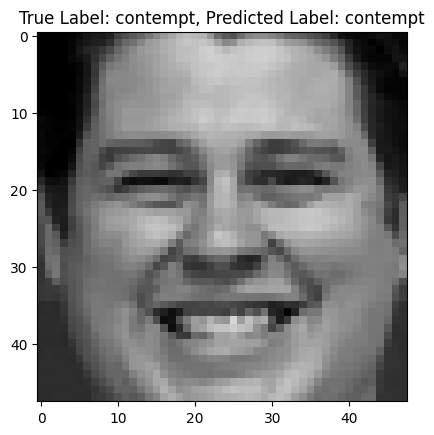

In [104]:
# Display an original image with the model's prediction
sample_image = X_test[0]
sample_label = y_test[0]

prediction = model.predict(np.expand_dims(sample_image, axis=0))[0]
predicted_label = np.argmax(prediction)
true_label = np.argmax(sample_label)

# Decode labels
emotions = os.listdir(dataset_path)
decoded_labels = {i: emotion for i, emotion in enumerate(emotions)}

# Display the results
plt.imshow(sample_image)
plt.title(f'True Label: {decoded_labels[true_label]}, Predicted Label: {decoded_labels[predicted_label]}')
plt.show()

1/1 [==============================] - 0s 35ms/step


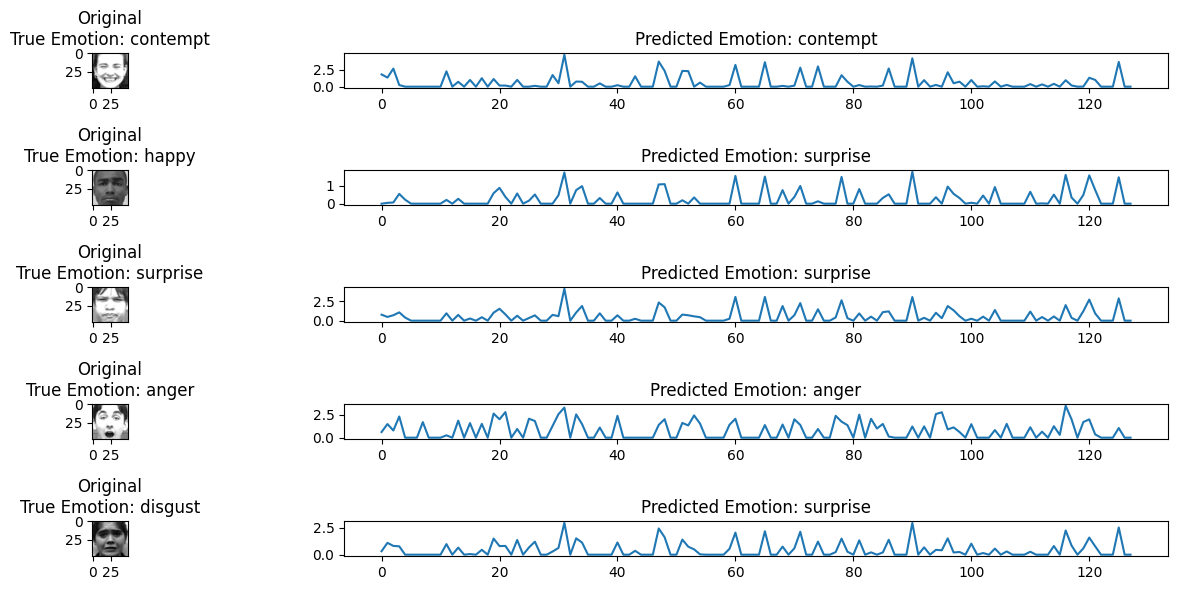

In [105]:
import random
# Extract features from the last dense layer of the trained model
feature_extraction_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Display features from random images
plt.figure(figsize=(15, 6))
for i in range(5):  # Display features for 5 random images
    random_index = random.randint(0, len(X_test) - 1)
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(X_test[random_index])
    true_emotion = os.listdir(dataset_path)[np.argmax(y_test[random_index])]
    plt.title(f'Original\nTrue Emotion: {true_emotion}')

    plt.subplot(5, 2, 2*i + 2)
    plt.plot(feature_extraction_model.predict(np.expand_dims(X_test[random_index], axis=0))[0])
    predicted_emotion = os.listdir(dataset_path)[np.argmax(model.predict(np.expand_dims(X_test[random_index], axis=0)))]
    plt.title(f'Predicted Emotion: {predicted_emotion}')

plt.tight_layout()
plt.show()

In [106]:
history=hist.history

In [107]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

7/7 [==============================] - 0s 27ms/step


In [108]:
from sklearn.metrics import confusion_matrix,classification_report
# Create confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)



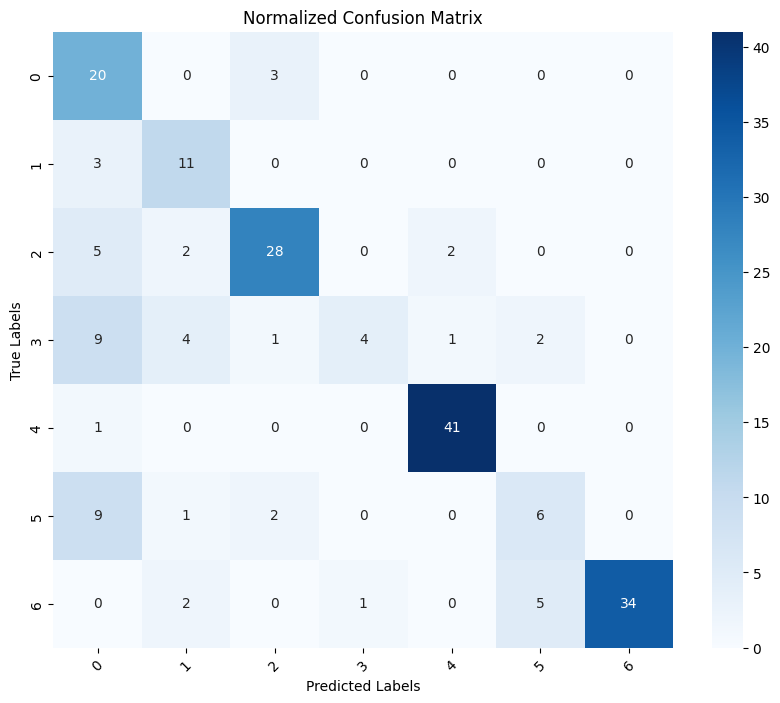

In [109]:


import seaborn as sns
# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Normalized Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

In [110]:
# Convert one-hot encoded true labels to integers
y_test_int = np.argmax(y_test, axis=1)

In [111]:
# Create classification report
report = classification_report(y_test_int, y_pred, target_names=[str(i) for i in range(num_classes)])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.87      0.57        23
           1       0.55      0.79      0.65        14
           2       0.82      0.76      0.79        37
           3       0.80      0.19      0.31        21
           4       0.93      0.98      0.95        42
           5       0.46      0.33      0.39        18
           6       1.00      0.81      0.89        42

    accuracy                           0.73       197
   macro avg       0.71      0.67      0.65       197
weighted avg       0.78      0.73      0.72       197



In [112]:
# Function to create a directory if it doesn't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
# Output directory for matched images
output_directory = '/kaggle/working/output_spp'
create_directory(output_directory)

In [113]:
# Display features from random images
plt.figure(figsize=(15, 6))
def process_data(X_test, y_test, feature_extraction_model, output_dir):
    for emotion in os.listdir(dataset_path):
        emotion_folder = os.path.join(output_dir, emotion)
        os.makedirs(emotion_folder, exist_ok=True)

        for i in range(len(X_test)):
            true_emotion = os.listdir(dataset_path)[np.argmax(y_test[i])]
            if true_emotion == emotion:
                plt.subplot(1, 2, 1)
                plt.imshow(X_test[i])
                plt.title(f'Original\nTrue Emotion: {true_emotion}')

                plt.subplot(1, 2, 2)
                plt.plot(feature_extraction_model.predict(np.expand_dims(X_test[i], axis=0))[0])
                predicted_emotion = os.listdir(dataset_path)[np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))]
                plt.title(f'Predicted Emotion: {predicted_emotion}')

                plt.tight_layout()
                plt.savefig(os.path.join(emotion_folder, f"sample_{i}.png"))
                plt.close()


process_data(X_test, y_test, feature_extraction_model, output_directory)
print("Processing completed. Output saved in:", output_directory)

1/1 [==============================] - 0s 21ms/step
Processing completed. Output saved in: /kaggle/working/output_spp
